In [1]:
!pip install pandas

In [2]:
!python -m pip install seaborn

In [1]:
#!C:\Users\sonda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

In [2]:
#!C:\Users\sonda\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip

In [5]:
import sys 
!{sys.executable} -m pip install seaborn

In [6]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

In [7]:
#%%1. Importing Libraries
#In this Notebook we will use a Pre Trained Model like Resnet50 for Classification of Dog Breed.

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

import tensorflow as tf
tf.config.run_functions_eagerly(True)
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings("ignore") 

In [12]:
plt.rcParams['font.size'] = 10

In [13]:
# %% 2. Fetching Data

In [16]:
fpath = "stanford-dogs-dataset_reduit/images/Images"
random_seed = 42

In [17]:
img_size = 224
batch_size =64
train = tf.keras.utils.image_dataset_from_directory(
  fpath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  label_mode ="categorical"
)

Found 1919 files belonging to 10 classes.
Using 1536 files for training.


In [18]:
val = tf.keras.utils.image_dataset_from_directory(
  fpath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  label_mode ="categorical"
)

Found 1919 files belonging to 10 classes.
Using 383 files for validation.


In [19]:
# %% 3. Plotting Data

In [20]:
class_names = train.class_names

In [21]:
names=[]
for name in class_names :
    names.append(name.split("-")[1]) 
    
print(names[:10]) # Printing some species

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound']


In [22]:
# %% Visualizing some images of different Classes

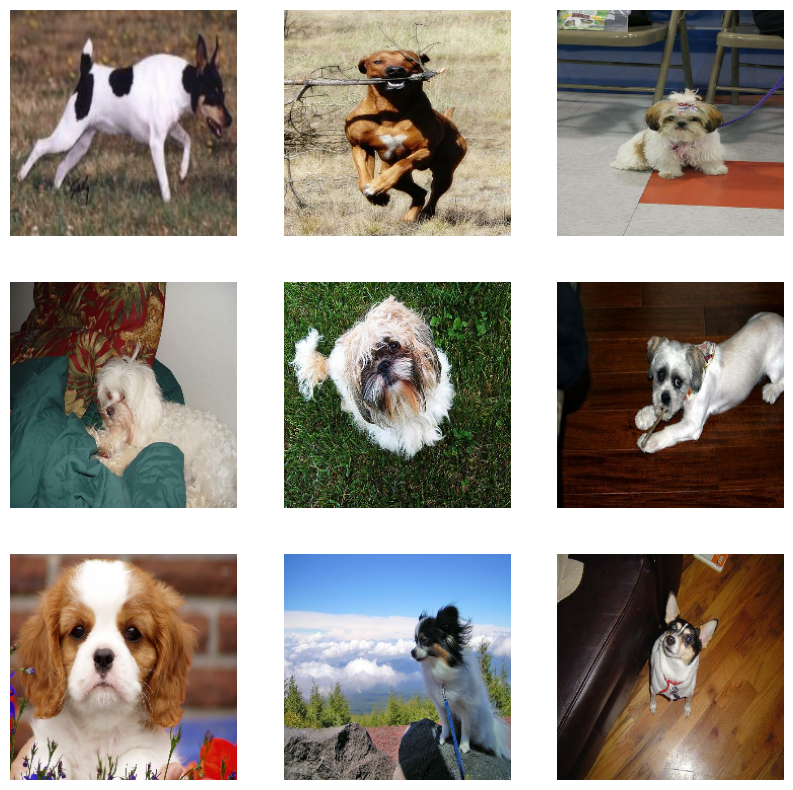

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [24]:
# %% 4. Building a Model (Resnet50)

In [25]:
# We are calling Resnet50 and adding some layers of our own
# Below is the Architecture of Resnet50

In [37]:
Model_URL ='https://kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-classification/versions/2'
model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
    hub.KerasLayer(Model_URL),
    tf.keras.layers.Dense(10, activation="softmax")])
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [38]:
# Compiling the model in which we are using Categorical Crossentropy and the optimizer is Adam.

In [39]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )

In [40]:
model.build((img_size, img_size, 3))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 dense_1 (Dense)             (None, 10)                10020     
                                                                 
Total params: 25,625,869
Trainable params: 10,020
Non-trainable params: 25,615,849
_________________________________________________________________


In [42]:
# We will add 3 Very Important Callbacks for our model
# ----- ModelCheckpoint: This callback saves the model weights after every epoch if the validation loss improves.
# ----- EarlyStopping: This callback stops the training process if the validation loss doesn't improve for a certain number of epochs.
# ----- ReduceLROnPlateu: This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
# All of them prevent Overfitting and save the best model according to the validation loss.

In [43]:
model_name = "model_reduit.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

 

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0, patience = 3,
                                                 verbose = 1, restore_best_weights=True)

reduce_lr = tf._keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [44]:
history = model.fit(train, epochs=30, validation_data=val, callbacks=[checkpoint,earlystopping, reduce_lr])

Epoch 1/30
24/24 [==============================] - ETA: 0s - loss: 1.5409 - accuracy: 0.5905   
Epoch 1: val_loss improved from inf to 0.44393, saving model to model_reduit.h5
24/24 [==============================] - 36494s 1580s/step - loss: 1.5409 - accuracy: 0.5905 - val_loss: 0.4439 - val_accuracy: 0.8668 - lr: 0.0010
Epoch 2/30
24/24 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8913  
Epoch 2: val_loss improved from 0.44393 to 0.32144, saving model to model_reduit.h5
24/24 [==============================] - 12211s 529s/step - loss: 0.3306 - accuracy: 0.8913 - val_loss: 0.3214 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 3/30
24/24 [==============================] - ETA: 0s - loss: 0.2270 - accuracy: 0.9186  
Epoch 3: val_loss improved from 0.32144 to 0.30578, saving model to model_reduit.h5
24/24 [==============================] - 1660s 68s/step - loss: 0.2270 - accuracy: 0.9186 - val_loss: 0.3058 - val_accuracy: 0.9086 - lr: 0.0010
Epoch 4/30
24/24 [=====